# Multidimensional integrator

This demo implements an N-dimensional neural integrator.

This example utilizes a recurrent network.
It shows how neurons can be used to implement stable dynamics.
Such dynamics are important for memory, noise cleanup,
statistical inference, and many other dynamic transformations.

It employs the `EnsembleArray` network,
which provides a convenient method to act on
multiple low-dimensional ensembles as though
they were one high-dimensional ensemble.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

import nengo
from nengo.networks import EnsembleArray
from nengo.processes import Piecewise
import nengo_loihi

nengo_loihi.set_defaults()

## Creating the network in Nengo

Our model consists of one recurrently connected ensemble array,
and an input node for each dimension.
The input nodes will provide piecewise step functions as input
so that we can see the effects of recurrence.

In [2]:
dimensions = 3
tau = 0.1

with nengo.Network(label="Integrator") as model:
    ens = EnsembleArray(n_neurons=100, n_ensembles=dimensions)
    stims = [
        nengo.Node(
            Piecewise(
                {
                    0: 0,
                    0.2: np.random.uniform(low=0.5, high=3.0),
                    1: 0,
                    2: np.random.uniform(low=-3, high=-0.5),
                    3: 0,
                    4: np.random.uniform(low=-3, high=3),
                    5: 0,
                }
            )
        )
        for dim in range(dimensions)
    ]
    for i, stim in enumerate(stims):
        nengo.Connection(stim, ens.input[i], transform=[[tau]], synapse=tau)

    # Connect the ensemble array to itself
    nengo.Connection(ens.output, ens.input, synapse=tau)

    # Collect data for plotting
    stim_probes = [nengo.Probe(stim) for stim in stims]
    ens_probe = nengo.Probe(ens.output, synapse=0.01)

## Running the network in Nengo

We can use Nengo to see the desired model output.

In [3]:
with nengo.Simulator(model) as sim:
    sim.run(6)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

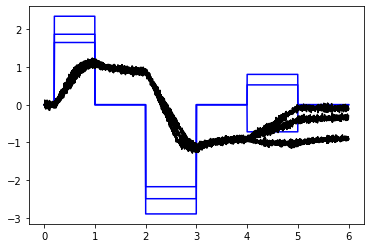

In [4]:
def plot_decoded(t, data):
    plt.figure()
    for stim_probe in stim_probes:
        plt.plot(t, data[stim_probe], color="b")
    plt.plot(t, data[ens_probe], "k")


plot_decoded(t, sim.data)

## Running the network with NengoLoihi

In [5]:
with nengo_loihi.Simulator(model) as sim:
    sim.run(6)
t = sim.trange()

/home/travis/build/nengo/nengo-loihi/nengo_loihi/builder/discretize.py:477: UserWarning: Lost 2 extra bits in weight rounding
  warnings.warn("Lost %d extra bits in weight rounding" % (-s2,))


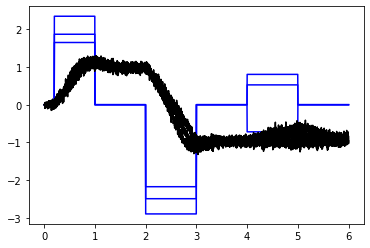

In [6]:
plot_decoded(t, sim.data)